In [225]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def normalize1(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for c in range(img.shape[2]):
                img[i][j][c] = np.uint8(img[i][j][c] % 256)
    return img

def normalize2(img):
    for c in range(img.shape[2]):
        max = 0
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if max < img[i][j][c]:
                    max = img[i][j][c]
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                img[i][j][c] = np.uint8(round(img[i][j][c] / max * 255))
    return img

def FHT_vert_r(img):
    height = img.shape[0]   # высота картинки (ее делим пополам на каждой итерации)
    length = img.shape[1]   # длина картинки
    channels = img.shape[2]
    
    hough_Img = np.array([ [ [0] * channels for i in range(length)] for j in range(height)])
    if(height == 1):
        return img
    
    top = img[:(height // 2)]   # верх картинки
    bottom = img[(height // 2):] # низ картинки
    
    hough_top = FHT_vert_r(top)       # Хаф-образы верха и низа соответсвенно
    hough_bottom = FHT_vert_r(bottom) #
    
    for ch in range(channels):
        for i in range(height - 1, 0, -2):
            shift = height // 2 - 1 - (i - 1) // 2 # смещение
            for j in range(length):
                index = j + shift
                if(index >= length):
                    index = index % length
                
                hough_Img[i][j][ch] = int(hough_bottom[(i - 1) // 2][j][ch]) + int(hough_top[(i - 1) // 2][index][ch])
                index = j + shift + 1
                if(index >= length):
                    index = index % length
                    
                hough_Img[i - 1][j][ch] = int(hough_bottom[(i - 1) // 2][j][ch]) + int(hough_top[(i - 1) // 2][index][ch])
    return hough_Img

def FHT_vert_l(img):
    height = img.shape[0]   
    length = img.shape[1]   
    channels = img.shape[2]
    
    hough_Img = np.array([ [ [0] * channels for i in range(length)] for j in range(height)])
    if(height == 1):
        return img
    
    top = img[:(height // 2)]   
    bottom = img[(height // 2):] 
    
    hough_top = FHT_vert_l(top)       
    hough_bottom = FHT_vert_l(bottom) 
    
    for ch in range(channels):
        for i in range(height - 1, 0, -2):
            shift = height // 2 - 1 - (i - 1) // 2 
            for j in range(length):
                index = j - shift
                if(index >= length):
                    index = index % length
                
                hough_Img[i][j][ch] = int(hough_bottom[(i - 1) // 2][j][ch]) + int(hough_top[(i - 1) // 2][index][ch])
                index = j - shift - 1
                if(index >= length):
                    index = index % length
                    
                hough_Img[i - 1][j][ch] = int(hough_bottom[(i - 1) // 2][j][ch]) + int(hough_top[(i - 1) // 2][index][ch])
    return hough_Img

def FHT_horiz_l(img):
    height = img.shape[0]   
    length = img.shape[1]  
    channels = img.shape[2]
    
    hough_Img = np.array([ [ [0] * channels for i in range(length)] for j in range(height)])
    if(length == 1):
        return img
    
    left = []
    right = []
    for i in range(height):
        left.append(img[i][:(length // 2)])
        right.append(img[i][(length // 2):])
    hough_top = FHT_horiz_l(np.array(left)) 
    hough_bottom = FHT_horiz_l(np.array(right)) #
    
    for ch in range(channels):
        for i in range(length - 1, 0, -2):
            shift = length // 2 - 1 - (i - 1) // 2 
            for j in range(height):
                index = j + shift
                if(index >= height):
                    index = index % height
                
                hough_Img[j][i][ch] = int(hough_bottom[j][(i - 1) // 2][ch]) + int(hough_top[index][(i - 1) // 2][ch])
                index = j + shift + 1
                if(index >= height):
                    index = index % height
                    
                hough_Img[j][i - 1][ch] = int(hough_bottom[j][(i - 1) // 2][ch]) + int(hough_top[index][(i - 1) // 2][ch])
    return hough_Img

def FHT_horiz_r(img):
    height = img.shape[0]   
    length = img.shape[1]   
    channels = img.shape[2]
    
    hough_Img = np.array([ [ [0] * channels for i in range(length)] for j in range(height)])
    if(length == 1):
        return img
    
    left = []
    right = []
    for i in range(height):
        left.append(img[i][:(length // 2)])
        right.append(img[i][(length // 2):])
        #print(">>", img[i][:(length // 2)])
    hough_top = FHT_horiz_r(np.array(left))       
    hough_bottom = FHT_horiz_r(np.array(right)) 
    
    for ch in range(channels):
        for i in range(length - 1, 0, -2):
            shift = length // 2 - 1 - (i - 1) // 2 
            for j in range(height):
                index = j - shift
                if(index >= height):
                    index = index % height
                
                hough_Img[j][i][ch] = int(hough_bottom[j][(i - 1) // 2][ch]) + int(hough_top[index][(i - 1) // 2][ch])
                index = j - shift - 1
                if(index >= height):
                    index = index % height
                    
                hough_Img[j][i - 1][ch] = int(hough_bottom[j][(i - 1) // 2][ch]) + int(hough_top[index][(i - 1) // 2][ch])
    return hough_Img


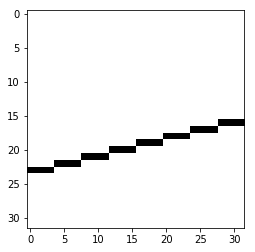

In [226]:
img2 = cv.imread("./img/line64x64_horiz_l.png")
plt.imshow(img2)

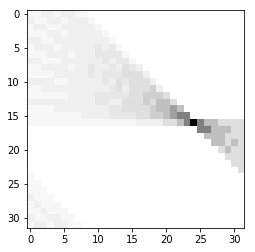

In [227]:
himg = FHT_horiz_l(img2)
plt.imshow(normalize2(himg))

In [228]:
def detector_max(himg):
    size = himg.shape[0]
    channels = himg.shape[2]
    max = 0
    a = 0
    maxx = 0
    maxy = 0
    for i in range(size):
        for j in range(size):
            a = 0
            for c in range(channels):
                a += himg[i][j][c]
            if (a > max):
                max = a
                maxx = i
                maxy= j
    return maxx, maxy

def detector_min(himg):
    size = himg.shape[0]
    channels = himg.shape[2]
    min = 255 * 3
    a = 0
    minx = 0
    miny = 0
    for i in range(size):
        for j in range(size):
            a = 0
            for c in range(channels):
                a += himg[i][j][c]
            if (a < min):
                min = a
                minx = i
                miny= j
    return minx, miny

print(detector_min(himg))
detect_min = detector_min(himg)

(16, 24)


[1 1 1 0 0]


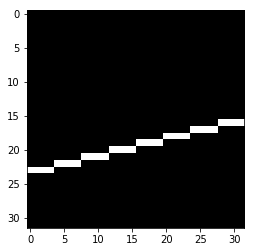

In [229]:
def rd(n):
    if((n - int(n)) >= 0.5):
        return (int(n)+1)
    else:
        return int(n)

from math import log2
    
def draw_vert_l(img, s, t, color):
    p = int(log2(img.shape[0]))
    t_bytes = np.zeros(p, dtype=int)
    for i in range(p):
        t_bytes[i] = t % 2
        t = t // 2
    print(t_bytes)

    for x in range(img.shape[0]):
        y = 0
        for k in range(len(t_bytes)):
            y += t_bytes[k] * rd(2 ** k * x/ (img.shape[0] - 1))
        y += s
        y = y % img.shape[0]
        img[x][y] = np.uint8(color)
    return img

def draw_vert_r(img, s, t, color):
    p = int(log2(img.shape[0]))
    t_bytes = np.zeros(p, dtype=int)
    for i in range(p):
        t_bytes[i] = t % 2
        t = t // 2
    print(t_bytes)

    for x in range(img.shape[0]):
        y = 0
        for k in range(len(t_bytes)):
            y -= t_bytes[k] * rd(2 ** k * x/ (img.shape[0] - 1))
        y += s
        y = y % img.shape[0]
        img[x][y] = np.uint8(color)
    return img

def draw_horiz_r(img, s, t, color):
    p = int(log2(img.shape[0]))
    t_bytes = np.zeros(p, dtype=int)
    for i in range(p):
        t_bytes[i] = t % 2
        t = t // 2
    print(t_bytes)

    for y in range(img.shape[0]):
        x = 0
        for k in range(len(t_bytes)):
            x += t_bytes[k] * rd(2 ** k * y/ (img.shape[0] - 1))
        x += s
        x = x % img.shape[0]
        img[x][y] = np.uint8(color)
    return img

def draw_horiz_l(img, s, t, color):
    p = int(log2(img.shape[0]))
    t_bytes = np.zeros(p, dtype=int)
    for i in range(p):
        t_bytes[i] = t % 2
        t = t // 2
    print(t_bytes)

    for y in range(img.shape[0]):
        x = 0
        for k in range(len(t_bytes)):
            x -= t_bytes[k] * rd(2 ** k * y/ (img.shape[0] - 1))
        x += s
        x = x % img.shape[0]
        img[x][y] = np.uint8(color)
    return img

#canvas = np.zeros((16, 16,3), dtype = np.uint8)
#uuu = draw_horiz_l(canvas, 8, 3, (255, 255, 255))
#plt.imshow(uuu)
canvas = np.zeros((32, 32,3), dtype = np.uint8)
t = 31 - detect_min[1]
s = detect_min[0] + t
canvas = draw_horiz_l(canvas, s, t, (255, 255, 255))
plt.imshow(canvas)

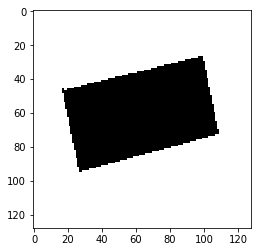

In [230]:
img = cv.imread("./img/qqq.png")
plt.imshow(img)

(0, 122)


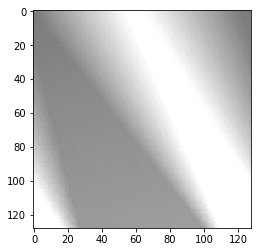

In [231]:
himg = normalize2(FHT_vert_r(img))
plt.imshow(himg)
detect_min = detector_min(himg)
print(detect_min)

[1 1 1 1 1 0 0]


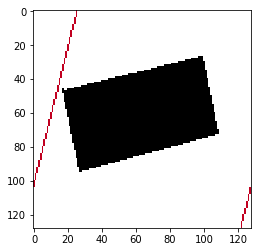

In [232]:
t = 31 - detect_min[0]
s = detect_min[1] + t
qimg = draw_vert_r(img, s, t, (193, 0, 32))
plt.imshow(qimg)

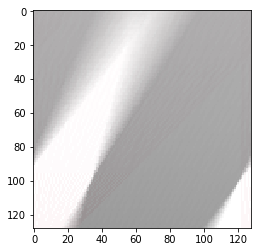

In [233]:
himg = FHT_vert_l(img)
plt.imshow(normalize2(himg))

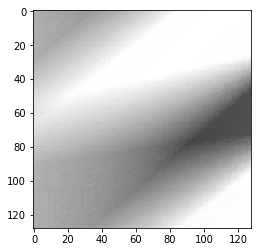

In [234]:
himg = FHT_horiz_r(img)
plt.imshow(normalize2(himg))

(44, 88)


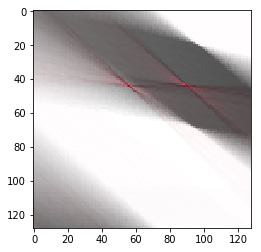

In [241]:
himg = FHT_horiz_l(img)
plt.imshow(normalize2(himg))
detect_min = detector_min(himg)
print(detect_min)

[1 1 1 0 0 0 1]


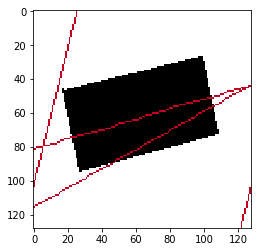

In [240]:
t = 31 - detect_min[1]
s = detect_min[0] + t
canvas = draw_horiz_l(img, s, t, (193, 0, 32))
plt.imshow(canvas)